<a href="https://colab.research.google.com/github/lukaszek358/SDA/blob/main/projekt_ko%C5%84cowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
airlines = pd.read_csv('/content/drive/MyDrive/airlines.csv')
airports = pd.read_csv('/content/drive/MyDrive/airports.csv')
flights = pd.read_csv('/content/drive/MyDrive/flights.csv')

<ipython-input-3-75ade1400bb7>:3: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/content/drive/MyDrive/flights.csv')


In [5]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [6]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [7]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
merged_flights = pd.merge(flights, airports, left_on= 'ORIGIN_AIRPORT', right_on = 'IATA_CODE')
merged_flights = pd.merge(merged_flights, airlines, left_on= 'AIRLINE', right_on = 'IATA_CODE')
merged_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,IATA_CODE_x,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,IATA_CODE_y,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,134,N464AS,ANC,SEA,155,...,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,AS,Alaska Airlines Inc.


In [9]:
len(airports.IATA_CODE.unique())

322

In [10]:
len(merged_flights.DESTINATION_AIRPORT.unique())

322

In [11]:
len(merged_flights.AIRLINE_y.unique())

14

In [12]:
raw_flights = merged_flights.rename(columns=str.lower)

In [13]:
raw_flights['date'] = pd.to_datetime(raw_flights[['year','month', 'day']], format='%Y-%m-%d')
first_column = raw_flights.pop('date')
raw_flights.insert(0, 'date', first_column)

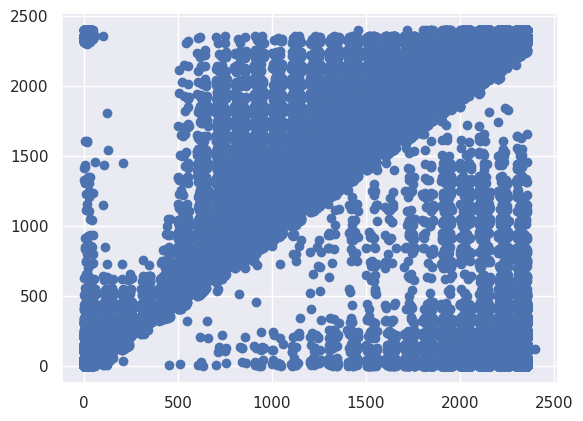

In [14]:
sns.set()
plt.scatter(x = raw_flights.scheduled_arrival, y = raw_flights.arrival_time)

In [15]:
raw_flights.columns

Index(['date', 'year', 'month', 'day', 'day_of_week', 'airline_x',
       'flight_number', 'tail_number', 'origin_airport', 'destination_airport',
       'scheduled_departure', 'departure_time', 'departure_delay', 'taxi_out',
       'wheels_off', 'scheduled_time', 'elapsed_time', 'air_time', 'distance',
       'wheels_on', 'taxi_in', 'scheduled_arrival', 'arrival_time',
       'arrival_delay', 'diverted', 'cancelled', 'cancellation_reason',
       'air_system_delay', 'security_delay', 'airline_delay',
       'late_aircraft_delay', 'weather_delay', 'iata_code_x', 'airport',
       'city', 'state', 'country', 'latitude', 'longitude', 'iata_code_y',
       'airline_y'],
      dtype='object')

In [16]:
raw_flights = raw_flights.drop(['year', 'airline_x', 'flight_number', 'tail_number', 'origin_airport', 'destination_airport', 'taxi_in', 'wheels_on', 'elapsed_time', 'diverted', 'air_time', 'cancelled', 'cancellation_reason', 'air_system_delay','security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay', 'departure_time', 'arrival_time', 'iata_code_x', 'airport', 'city', 'state', 'country', 'latitude', 'longitude', 'iata_code_y' ], axis=1)
raw_flights

,date,month,day,day_of_week,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,airline_y
0,2015-01-01,1,1,4,5,-11.0,21.0,15.0,205.0,1448,430,-22.0,Alaska Airlines Inc.
1,2015-01-01,1,1,4,45,-4.0,17.0,58.0,204.0,1448,509,-14.0,Alaska Airlines Inc.
2,2015-01-01,1,1,4,50,-4.0,11.0,57.0,215.0,1542,525,-18.0,Alaska Airlines Inc.
3,2015-01-01,1,1,4,135,NaN,NaN,NaN,205.0,1448,600,NaN,Alaska Airlines Inc.
4,2015-01-01,1,1,4,155,-15.0,17.0,157.0,218.0,1448,633,-35.0,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332909,2015-04-05,4,5,7,615,-6.0,35.0,644.0,104.0,353,759,0.0,Atlantic Southeast Airlines
5332910,2015-04-05,4,5,7,1706,6.0,22.0,1734.0,102.0,353,1848,10.0,Atlantic Southeast Airlines
5332911,2015-04-15,4,15,3,620,-2.0,24.0,642.0,96.0,353,756,-3.0,Atlantic Southeast Airlines
5332912,2015-04-22,4,22,3,620,-4.0,35.0,651.0,96.0,353,756,7.0,Atlantic Southeast Airlines


In [17]:
raw_flights = raw_flights.rename(columns= {'airline_y' : 'airline'})

In [18]:
raw_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5332913
Data columns (total 13 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   month                int64         
 2   day                  int64         
 3   day_of_week          int64         
 4   scheduled_departure  int64         
 5   departure_delay      float64       
 6   taxi_out             float64       
 7   wheels_off           float64       
 8   scheduled_time       float64       
 9   distance             int64         
 10  scheduled_arrival    int64         
 11  arrival_delay        float64       
 12  airline              object        
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 569.6+ MB


In [19]:
from datetime import datetime

In [20]:
def zamien_na_godziny_i_minuty(x):
    if x == 2359:
        return '23:59'
    elif x == 2400:
        return '00:00'
    else:
        x = str(x).zfill(4)
        return x[:2] + ':' + x[2:]

In [21]:
hour_order = [str(i).zfill(2) for i in range(24)]

<Axes: xlabel='scheduled_dep', ylabel='arrival_delay'>

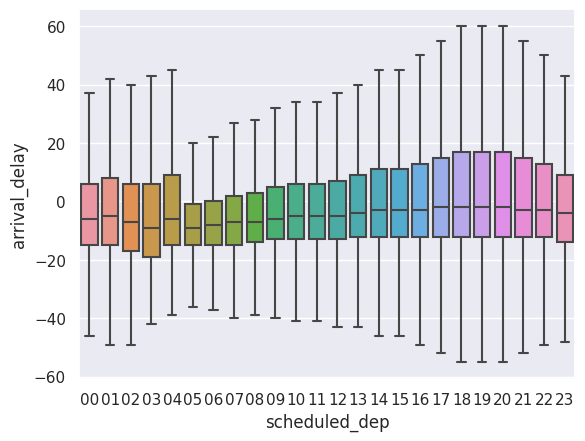

In [22]:
raw_flights['scheduled_departure'] = raw_flights['scheduled_departure'].apply(zamien_na_godziny_i_minuty)
raw_flights['scheduled_dep']= raw_flights['scheduled_departure'].str.split(':').str[0]

raw_flights['scheduled_dep'] = pd.Categorical(raw_flights['scheduled_dep'], categories=hour_order, ordered=True)
sns.boxplot(x='scheduled_dep', y='arrival_delay', data=raw_flights, showfliers=False)

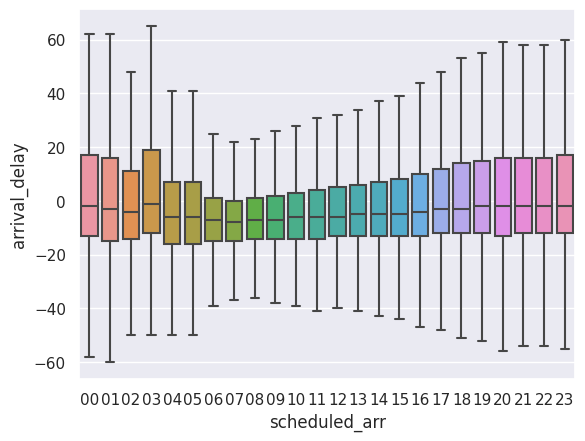

In [23]:
raw_flights['scheduled_arrival'] = raw_flights['scheduled_arrival'].apply(zamien_na_godziny_i_minuty)
raw_flights['scheduled_arr'] = raw_flights['scheduled_arrival'].str.split(':').str[0]

raw_flights['scheduled_arr'] = pd.Categorical(raw_flights['scheduled_arr'], categories=hour_order, ordered=True)

sns.boxplot(x='scheduled_arr', y='arrival_delay', data=raw_flights, showfliers=False)
plt.show()

In [24]:
raw_flights.columns

Index(['date', 'month', 'day', 'day_of_week', 'scheduled_departure',
       'departure_delay', 'taxi_out', 'wheels_off', 'scheduled_time',
       'distance', 'scheduled_arrival', 'arrival_delay', 'airline',
       'scheduled_dep', 'scheduled_arr'],
      dtype='object')

In [25]:
raw_flights['scheduled_departure'] = pd.to_datetime(raw_flights['scheduled_departure']).dt.minute + pd.to_datetime(raw_flights['scheduled_departure']).dt.hour * 60
raw_flights['scheduled_departure']

0             5
1            45
2            50
3            95
4           115
           ... 
5332909     375
5332910    1026
5332911     380
5332912     380
5332913     380
Name: scheduled_departure, Length: 5332914, dtype: int64

In [26]:
raw_flights['scheduled_departure'].max()

1439

In [27]:
raw_flights['scheduled_arrival'] = pd.to_datetime(raw_flights['scheduled_arrival']).dt.minute + pd.to_datetime(raw_flights['scheduled_arrival']).dt.hour * 60
raw_flights['scheduled_arrival']

0           270
1           309
2           325
3           360
4           393
           ... 
5332909     479
5332910    1128
5332911     476
5332912     476
5332913     476
Name: scheduled_arrival, Length: 5332914, dtype: int64

In [28]:
raw_flights['scheduled_arrival'].max()

1439

In [29]:
raw_flights['arrival_delay'] = raw_flights['arrival_delay'].fillna(0)

In [30]:
raw_flights['departure_delay'] = raw_flights['departure_delay'].fillna(0)

In [31]:
raw_flights['taxi_out'] = raw_flights['taxi_out'].fillna(raw_flights['taxi_out'].mean())

In [32]:
raw_flights.isnull().sum()

date                       0
month                      0
day                        0
day_of_week                0
scheduled_departure        0
departure_delay            0
taxi_out                   0
wheels_off             86612
scheduled_time             6
distance                   0
scheduled_arrival          0
arrival_delay              0
airline                    0
scheduled_dep              0
scheduled_arr              0
dtype: int64

In [33]:
raw_flights = raw_flights.dropna(axis = 0)
raw_flights = raw_flights.reset_index(drop = True)
raw_flights['wheels_off'] = raw_flights['wheels_off'].astype(int)

In [34]:
# raw_flights.isnull().sum()

In [35]:
raw_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5246296 entries, 0 to 5246295
Data columns (total 15 columns):
 #   Column               Dtype         
---  ------               -----         
 0   date                 datetime64[ns]
 1   month                int64         
 2   day                  int64         
 3   day_of_week          int64         
 4   scheduled_departure  int64         
 5   departure_delay      float64       
 6   taxi_out             float64       
 7   wheels_off           int64         
 8   scheduled_time       float64       
 9   distance             int64         
 10  scheduled_arrival    int64         
 11  arrival_delay        float64       
 12  airline              object        
 13  scheduled_dep        category      
 14  scheduled_arr        category      
dtypes: category(2), datetime64[ns](1), float64(4), int64(7), object(1)
memory usage: 530.3+ MB


<Axes: xlabel='wheels_box', ylabel='arrival_delay'>

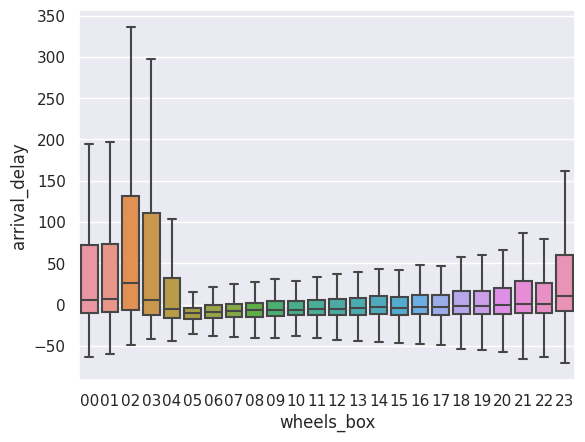

In [36]:
raw_flights['wheels_off'] = raw_flights['wheels_off'].apply(zamien_na_godziny_i_minuty)
raw_flights['wheels_box'] = raw_flights['wheels_off'].str.split(':').str[0]
raw_flights['wheels_box']
raw_flights['wheels_box'] = pd.Categorical(raw_flights['wheels_box'], categories=hour_order, ordered=True)
sns.boxplot(x='wheels_box', y='arrival_delay', data=raw_flights, showfliers=False)

In [37]:
raw_flights.head()

,date,month,day,day_of_week,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,airline,scheduled_dep,scheduled_arr,wheels_box
0,2015-01-01,1,1,4,5,-11.0,21.0,00:15,205.0,1448,270,-22.0,Alaska Airlines Inc.,00,04,00
1,2015-01-01,1,1,4,45,-4.0,17.0,00:58,204.0,1448,309,-14.0,Alaska Airlines Inc.,00,05,00
2,2015-01-01,1,1,4,50,-4.0,11.0,00:57,215.0,1542,325,-18.0,Alaska Airlines Inc.,00,05,00
3,2015-01-01,1,1,4,115,-15.0,17.0,01:57,218.0,1448,393,-35.0,Alaska Airlines Inc.,01,06,01
4,2015-01-01,1,1,4,120,-10.0,24.0,02:14,210.0,1542,390,-11.0,Alaska Airlines Inc.,02,06,02


In [38]:
raw_flights['wheels_off'] = pd.to_datetime(raw_flights['wheels_off']).dt.minute + pd.to_datetime(raw_flights['wheels_off']).dt.hour * 60
raw_flights['wheels_off']

0            15
1            58
2            57
3           117
4           134
           ... 
5246291     404
5246292    1054
5246293     402
5246294     411
5246295     392
Name: wheels_off, Length: 5246296, dtype: int64

In [39]:
raw_flights['wheels_off'].max()

1439

In [40]:
raw_flights['scheduled_departure_norm'] = 2 * math.pi * raw_flights['scheduled_departure'] / 1440
raw_flights["cos_scheduled_departure_norm"] = np.cos(raw_flights['scheduled_departure_norm'])

In [41]:
raw_flights['day_of_week_norm'] = 2 * math.pi * raw_flights['day_of_week'] / raw_flights.day_of_week.max()
raw_flights["cos_day_of_week_norm"] = np.cos(raw_flights['day_of_week_norm'])

In [42]:
raw_flights['scheduled_arrival_norm'] = 2 * math.pi * raw_flights['scheduled_arrival'] / 1440
raw_flights['cos_scheduled_arrival_norm'] = np.cos(raw_flights['scheduled_arrival_norm'])

In [43]:
raw_flights['wheels_off_norm'] = 2 * math.pi * raw_flights['wheels_off'] / 1440
raw_flights['cos_wheels_off_norm'] = np.cos(raw_flights['wheels_off_norm'])

In [44]:
raw_flights = raw_flights.drop(columns = ['scheduled_dep',	'scheduled_arr', 'wheels_box'], axis = 1)

In [45]:
raw_flights.columns

Index(['date', 'month', 'day', 'day_of_week', 'scheduled_departure',
       'departure_delay', 'taxi_out', 'wheels_off', 'scheduled_time',
       'distance', 'scheduled_arrival', 'arrival_delay', 'airline',
       'scheduled_departure_norm', 'cos_scheduled_departure_norm',
       'day_of_week_norm', 'cos_day_of_week_norm', 'scheduled_arrival_norm',
       'cos_scheduled_arrival_norm', 'wheels_off_norm', 'cos_wheels_off_norm'],
      dtype='object')

In [46]:
raw_flights['month_norm'] = 2 * math.pi * raw_flights['month'] / raw_flights.month.max()
raw_flights['cos_month_norm'] = np.cos(raw_flights['month_norm'])

<Axes: xlabel='day_of_week', ylabel='arrival_delay'>

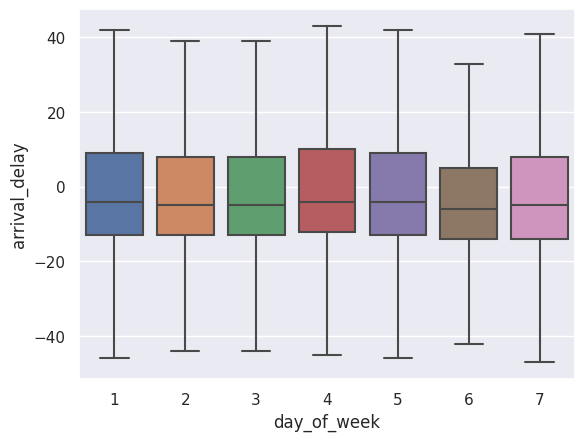

In [47]:
sns.boxplot(data = raw_flights, y = 'arrival_delay', x='day_of_week', showfliers=False)

<Axes: xlabel='airline', ylabel='arrival_delay'>

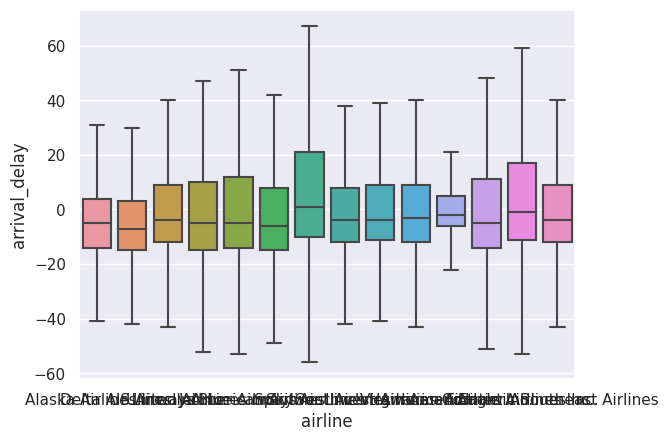

In [48]:
sns.boxplot(data = raw_flights, y = 'arrival_delay', x='airline', showfliers=False)

<Axes: xlabel='month', ylabel='arrival_delay'>

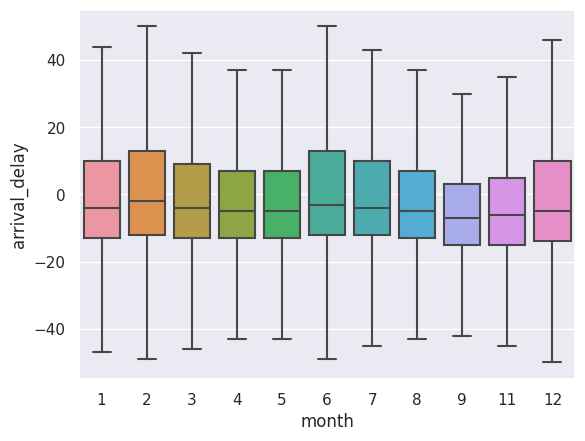

In [49]:
sns.boxplot(data = raw_flights, y = 'arrival_delay', x='month', showfliers=False) #showfliers - wyrzucamy 

In [50]:
raw_flights = raw_flights.drop(columns =['month','day', 'day_of_week'])

In [51]:
raw_flights.head()

,date,scheduled_departure,departure_delay,taxi_out,wheels_off,scheduled_time,distance,scheduled_arrival,arrival_delay,airline,scheduled_departure_norm,cos_scheduled_departure_norm,day_of_week_norm,cos_day_of_week_norm,scheduled_arrival_norm,cos_scheduled_arrival_norm,wheels_off_norm,cos_wheels_off_norm,month_norm,cos_month_norm
0,2015-01-01,5,-11.0,21.0,15,205.0,1448,270,-22.0,Alaska Airlines Inc.,0.021817,0.999762,3.590392,-0.900969,1.178097,0.382683,0.065450,0.997859,0.523599,0.866025
1,2015-01-01,45,-4.0,17.0,58,204.0,1448,309,-14.0,Alaska Airlines Inc.,0.196350,0.980785,3.590392,-0.900969,1.348267,0.220697,0.253073,0.968148,0.523599,0.866025
2,2015-01-01,50,-4.0,11.0,57,215.0,1542,325,-18.0,Alaska Airlines Inc.,0.218166,0.976296,3.590392,-0.900969,1.418080,0.152123,0.248709,0.969231,0.523599,0.866025
3,2015-01-01,115,-15.0,17.0,117,218.0,1448,393,-35.0,Alaska Airlines Inc.,0.501782,0.876727,3.590392,-0.900969,1.714786,-0.143493,0.510509,0.872496,0.523599,0.866025
4,2015-01-01,120,-10.0,24.0,134,210.0,1542,390,-11.0,Alaska Airlines Inc.,0.523599,0.866025,3.590392,-0.900969,1.701696,-0.130526,0.584685,0.833886,0.523599,0.866025


One Hot Encoding

In [66]:
airline_cat = raw_flights[['airline']]
airline_cat.head(20)

,airline
0,Alaska Airlines Inc.
1,Alaska Airlines Inc.
2,Alaska Airlines Inc.
3,Alaska Airlines Inc.
4,Alaska Airlines Inc.
5,Alaska Airlines Inc.
6,Alaska Airlines Inc.
7,Alaska Airlines Inc.
8,Alaska Airlines Inc.
9,Alaska Airlines Inc.


In [67]:
airline_cat = pd.get_dummies(data = airline_cat)

In [68]:
airline_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5246296 entries, 0 to 5246295
Data columns (total 14 columns):
 #   Column                                Dtype
---  ------                                -----
 0   airline_Alaska Airlines Inc.          uint8
 1   airline_American Airlines Inc.        uint8
 2   airline_American Eagle Airlines Inc.  uint8
 3   airline_Atlantic Southeast Airlines   uint8
 4   airline_Delta Air Lines Inc.          uint8
 5   airline_Frontier Airlines Inc.        uint8
 6   airline_Hawaiian Airlines Inc.        uint8
 7   airline_JetBlue Airways               uint8
 8   airline_Skywest Airlines Inc.         uint8
 9   airline_Southwest Airlines Co.        uint8
 10  airline_Spirit Air Lines              uint8
 11  airline_US Airways Inc.               uint8
 12  airline_United Air Lines Inc.         uint8
 13  airline_Virgin America                uint8
dtypes: uint8(14)
memory usage: 70.0 MB


<ipython-input-70-8cc1c246bd4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = raw_flights.corr()


<Axes: >

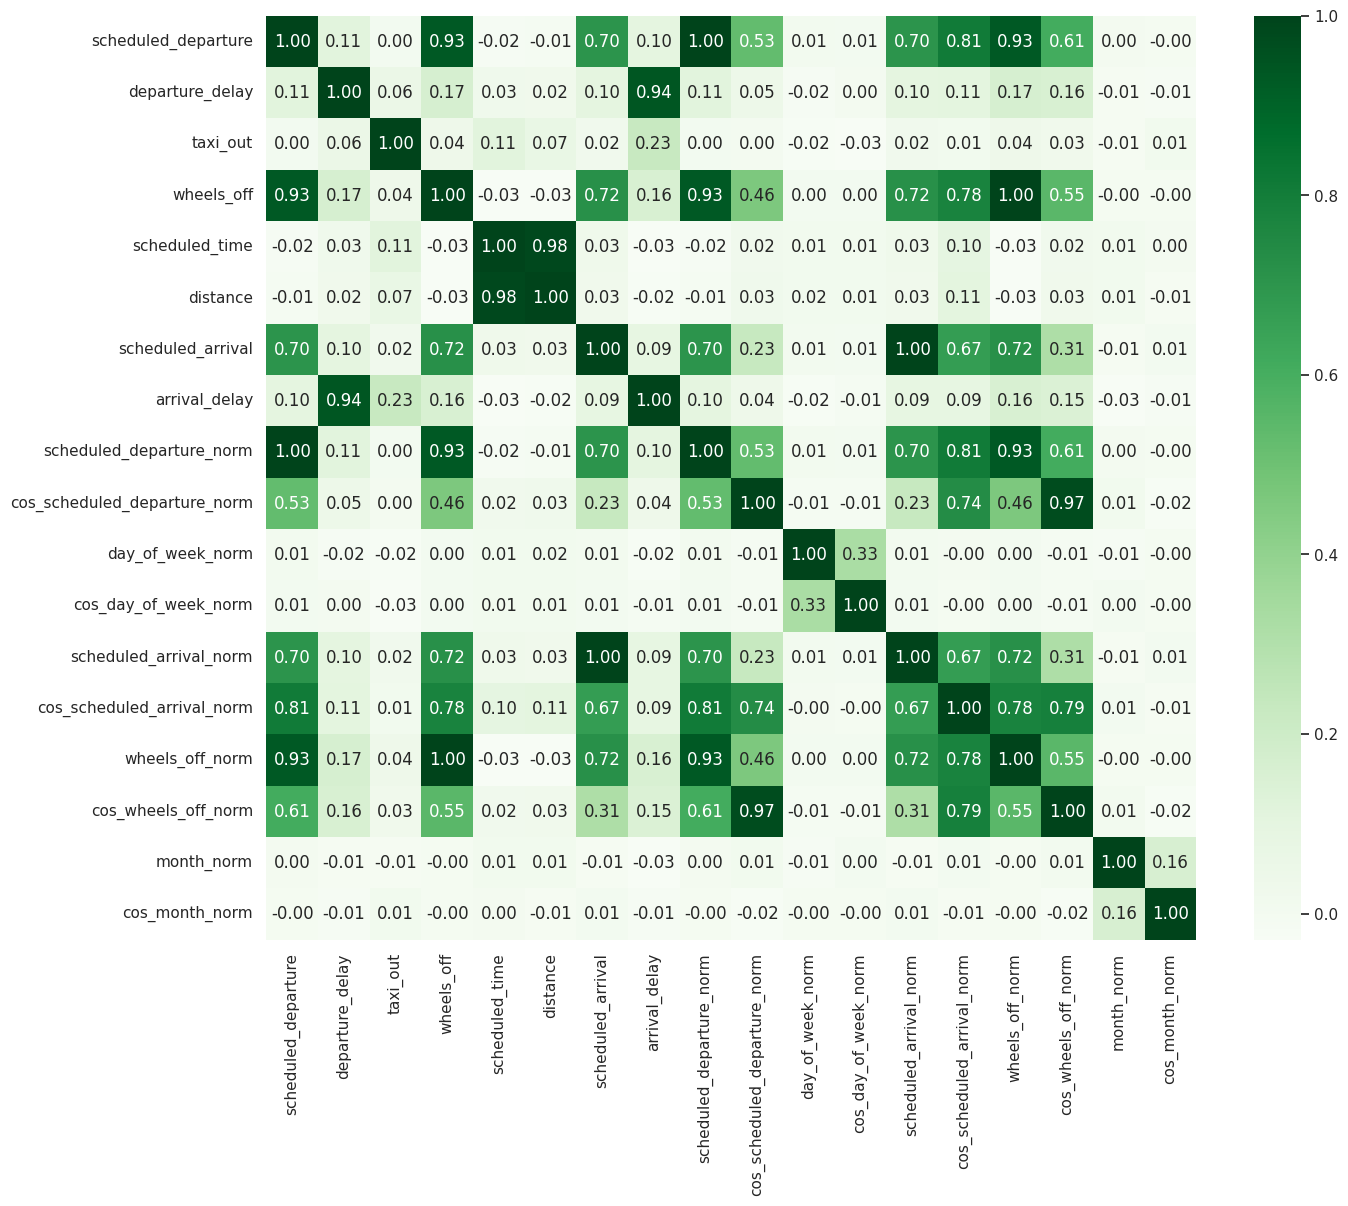

In [70]:
corr = raw_flights.corr()

f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corr, annot=True, fmt= '.2f', cmap = 'Greens', )